
0.1 200


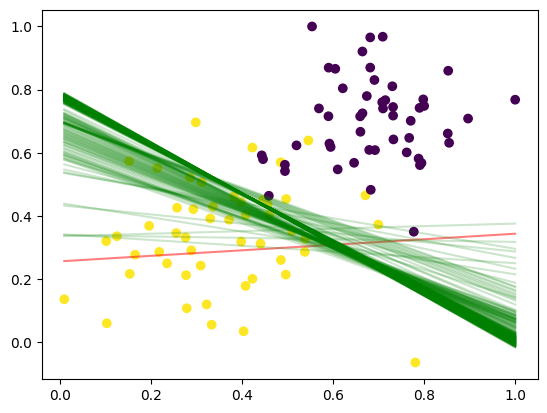

In [75]:
# https://www.geeksforgeeks.org/visualize-data-from-csv-file-in-python/
# https://www.statology.org/matplotlib-scatterplot-color-by-value/
# https://pyimagesearch.com/2021/05/06/implementing-the-perceptron-neural-network-with-python/
# https://github.com/matthewmcc/perceptron-python/blob/master/perceptron.py
# https://rasbt.github.io/mlxtend/user_guide/classifier/Perceptron/
# https://stackoverflow.com/questions/59581706/perceptron-algorithm-plotting-with-matplotlib


import csv
import pandas as pd
import matplotlib.pyplot as plt
X=[]
Y=[]
T=[]
B=[]

import numpy as np
class Perceptron:
    def __init__(self, N, Learning=0.1):
        # initialize the weight matrix and store the learning rate
        self.W = np.random.randn(N)
        self.b=np.random.randn(1)
        self.Learning = Learning

    def step(self, x):
        # apply the step function
        return 1 if x > 0 else 0

    def fit(self, X, y, epochs):
        # insert a column of 1's as the last entry in the feature
        # matrix -- this little trick allows us to treat the bias
        # as a trainable parameter within the weight matrix
        # loop over the desired number of epochs
        for epoch in np.arange(0, epochs):
            # loop over each individual data point
            for (x, target) in zip(X, y):
                # take the dot product between the input features
                # and the weight matrix, then pass this value
                # through the step function to obtain the prediction
                p = self.step(np.dot(x, self.W)+self.b)
                # print(p,target)
                # only perform a weight update if our prediction
                # does not match the target
                if p!=target:
                  if p==0:
                    self.b +=self.Learning
                    self.W += self.Learning*x
                  if p==1:
                    self.b -=self.Learning
                    self.W -= self.Learning*x
            B.append((-self.W[0] / self.W[1], -self.b/ self.W[1]))
with open('/data.csv', 'r') as file:
    reader = csv.reader(file,delimiter=',')
    for row in reader:
        X.append(float(row[0]))
        Y.append(float(row[1]))
        T.append(int(row[2]))
print()
plt.scatter(X, Y, c=T)
ep = 200
Perceptron=Perceptron(N=2,Learning=.1)
Perceptron.fit(np.array(list(zip(X, Y))), T, ep)
b = True

for slope, intercept in B:

    # Generate two points for the line
    x_vals = np.array([min(X), max(X)])
    y_vals = slope * x_vals + intercept

    # Plot the line
    if b:
        plt.plot(x_vals, y_vals, color='r', alpha=0.5)  # Adjust color and alpha as needed
        b = False
    else:
      plt.plot(x_vals, y_vals, color='g', alpha=0.2)  # Adjust color and alpha as needed
print(Perceptron.Learning, ep)
plt.show()  # Display the plot


10 700


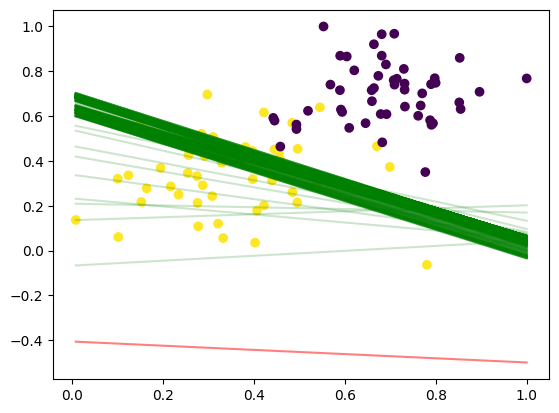

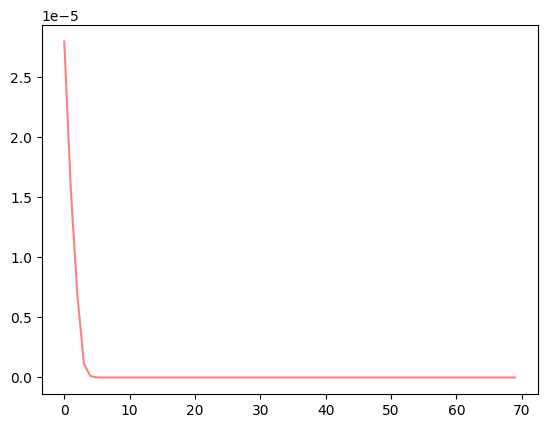

In [105]:
# https://www.geeksforgeeks.org/implement-sigmoid-function-using-numpy/

import csv
import pandas as pd
import matplotlib.pyplot as plt
X=[]
Y=[]
T=[]
B=[]
E=[]

import numpy as np
class Perceptron:
    def __init__(self, N, Learning):
        # initialize the weight matrix and store the learning rate
        self.W = np.random.randn(N)
        self.b=np.random.randn(1)
        self.Learning = Learning

    def step(self, x):
        # apply the step function
        return 1/(1 + np.exp(-x))

    def fit(self, X, y, epochs):
        # insert a column of 1's as the last entry in the feature
        # matrix -- this little trick allows us to treat the bias
        # as a trainable parameter within the weight matrix
        # loop over the desired number of epochs
        for epoch in np.arange(0, epochs):
            # loop over each individual data point
            for (x, target) in zip(X, y):
                # take the dot product between the input features
                # and the weight matrix, then pass this value
                # through the step function to obtain the prediction
                p = self.step(np.dot(x, self.W)+self.b)
                # print(p,target)
                # only perform a weight update if our prediction
                # does not match the target
                self.b +=self.Learning*(target-p)
                self.W += self.Learning*x*(target-p)

            B.append((-self.W[0] / self.W[1], -self.b/ self.W[1]))
            if epoch%10==0:
              E.append(p-target)
with open('/data.csv', 'r') as file:
    reader = csv.reader(file,delimiter=',')
    for row in reader:
        X.append(float(row[0]))
        Y.append(float(row[1]))
        T.append(int(row[2]))

plt.scatter(X, Y, c=T)
ep = 700
Perceptron=Perceptron(N=2,Learning=10)
Perceptron.fit(np.array(list(zip(X, Y))), T, ep)
b = True

for slope, intercept in B:

    # Generate two points for the line
    x_vals = np.array([min(X), max(X)])
    y_vals = slope * x_vals + intercept

    # Plot the line
    if b:
        plt.plot(x_vals, y_vals, color='r', alpha=0.5)  # Adjust color and alpha as needed
        b = False
    else:
      plt.plot(x_vals, y_vals, color='g', alpha=0.2)  # Adjust color and alpha as needed
print(Perceptron.Learning, ep)
plt.show()  # Display the plot
x_vals = np.arange(len(E))
plt.plot(x_vals, E, color='r', alpha=0.5)  # Adjust color and alpha as needed
plt.show()  # Display the plot

 I used gemini to mostly get the heurisitc alogithm part, so that is why this is here, this is my log, also had some errors with the tab stud it fixed
 Please explain the error:

  File "<ipython-input-15-2b0138b6c2c2>", line 18
    for epoch in np.arange(0, epochs):
    ^
TabError: inconsistent use of tabs and spaces in indentation
Hypothesis
The error message TabError: inconsistent use of tabs and spaces in indentation indicates that the code is mixing tabs and spaces for indentation, which is not allowed in Python. This is happening in the fit and step methods of the Perceptron class which appear to be defined outside of the class definition due to incorrect indentation.

Suggested Changes
# https://pyimagesearch.com/2021/05/06/implementing-the-perceptron-neural-network-with-python/
# import the necessary packages
import numpy as np
class Perceptron:
    def __init__(self, N, Learning=0.1):
        # initialize the weight matrix and store the learning rate
        self.W = np.random.randn(N + 1) / np.sqrt(N)
        self.Learning = Learning
        self.alpha = Learning # Added self.alpha to store learning rate
    
    def step(self, x):
        # apply the step function
        return 1 if x > 0 else 0
    
    def fit(self, X, y, epochs=10):
        # insert a column of 1's as the last entry in the feature
        # matrix -- this little trick allows us to treat the bias
        # as a trainable parameter within the weight matrix
        X = np.c_[X, np.ones((X.shape[0]))]
        # loop over the desired number of epochs
        for epoch in np.arange(0, epochs):
            # loop over each individual data point
            for (x, target) in zip(X, y):
                # take the dot product between the input features
                # and the weight matrix, then pass this value
                # through the step function to obtain the prediction
                p = self.step(np.dot(x, self.W))
                # only perform a weight update if our prediction
                # does not match the target
                if p != target:
                    # determine the error
                    error = p - target
                    # update the weight matrix
                    self.W += -self.alpha * error * x #Changed self.alpha
Use code with caution
Explanation of changes:

Indentation: The step and fit methods were incorrectly indented outside the class. We moved them inside with the correct level of indentation (4 spaces).
self.alpha: In the fit method, self.alpha was used to update weights, but it was not defined in the __init__. I added self.alpha = Learning to initialize it in the constructor and fix the error.
Sources
Rate this answer
so I want to change this so this perceptron will divide the X and Y points based upon the binary t value which is either 0 or 1

Okay, let's modify the code to use the binary t values for training and prediction.

# https://pyimagesearch.com/2021/05/06/implementing-the-perceptron-neural-network-with-python/
# import the necessary packages
import numpy as np

class Perceptron:
    def __init__(self, N, Learning=0.1):
        # initialize the weight matrix and store the learning rate
        self.W = np.random.randn(N + 1) / np.sqrt(N)
        self.Learning = Learning
        self.alpha = Learning  # Added self.alpha to store learning rate

    def step(self, x):
        # apply the step function
        return 1 if x > 0 else 0

    def fit(self, X, y, epochs=10):
        # insert a column of 1's as the last entry in the feature
        # matrix -- this little trick allows us to treat the bias
        # as a trainable parameter within the weight matrix
        X = np.c_[X, np.ones((X.shape[0]))]
        # loop over the desired number of epochs
        for epoch in np.arange(0, epochs):
            # loop over each individual data point
            for (x, target) in zip(X, y):
                # take the dot product between the input features
                # and the weight matrix, then pass this value
                # through the step function to obtain the prediction
                p = self.step(np.dot(x, self.W))
                # only perform a weight update if our prediction
                # does not match the target
                if p != target:
                    # determine the error
                    error = p - target
                    # update the weight matrix
                    self.W += -self.alpha * error * x  # Changed self.alpha
                
    def predict(self, X):
        # ensure our input is a matrix
        X = np.atleast_2d(X)
        # insert a column of 1's as the last entry in the feature
        # matrix -- this little trick allows us to treat the bias
        # as a trainable parameter within the weight matrix
        X = np.c_[X, np.ones((X.shape[0]))]
        # take the dot product between the input features and the
        # weight matrix, then pass this value through the step
        # function to obtain the prediction
        return self.step(np.dot(X, self.W))
Use code with caution
Changes and How to Use:

predict Method: I added a predict method to the Perceptron class. This method takes input data X (which should be a NumPy array), adds a bias term, and then uses the trained weights to make predictions using the step function.

Training:

# Assuming X, Y, and T are your data from the CSV file
   import numpy as np
   X = np.array(X)  # Convert X to a NumPy array
   Y = np.array(Y)  # Convert Y to a NumPy array
   
   # Create and train the perceptron
   p = Perceptron(N=2, Learning=0.1)  # N=2 for 2 features (X, Y)
   p.fit(np.array(list(zip(X, Y))), T, epochs=10)
Use code with caution
Prediction:
# Make predictions on new data points
   new_data = np.array([[0.5, 0.6], [0.2, 0.3]])
   predictions = p.predict(new_data)
   print(predictions)
Use code with caution
Explanation:

Training: We now use the t values (0 or 1) as the target variable (y) during training. This teaches the perceptron to classify points based on these binary values.
Prediction: The predict method applies the learned weights to new data points to predict their class (0 or 1).
N=2: When creating the Perceptron object, we use N=2 because we have two features (X and Y) in our data.
Sources
Rate this answer
Start a perceptron with random weights and bias: w 1 , w 2 , ..., w n , b
For each of all points (data) with their corresponding labels (answers):
Classify according to the perceptron
For a misclassified point (x 1 ,x 2 , ..., x n ) :
2.1. If classification==0:
2.1.1. b + r → b
2.1.2. For all w i : wi + rx i → wi
2.2. If classification==1:
2.2.1. b - r → b
2.2.2. For all w i : wi - rx i → wi
Repeat #2 enough number of times Earlier heuristic approach with binary classification i have to do this with the perceptron
Okay, let's modify the Perceptron class to implement the specific algorithm you've described.

import numpy as np

class Perceptron:
    def __init__(self, N, Learning=0.1):
        # Initialize weights and bias randomly
        self.W = np.random.randn(N)  # Weights for features
        self.b = np.random.randn(1)  # Bias
        self.Learning = Learning  # Learning rate (r)

    def step(self, x):
        # Apply the step function
        return 1 if x > 0 else 0

    def classify(self, x):
        # Classify a data point
        activation = np.dot(x, self.W) + self.b
        return self.step(activation)

    def fit(self, X, y, epochs=10):
        # Training loop
        for epoch in range(epochs):
            for i in range(len(X)):
                x = X[i]
                target = y[i]
                
                # Classify the point
                classification = self.classify(x)
                
                # Update weights and bias if misclassified
                if classification != target:
                    if classification == 0:
                        self.b += self.Learning  # b + r → b
                        self.W += self.Learning * x  # wi + rx i → wi
                    else:  # classification == 1
                        self.b -= self.Learning  # b - r → b
                        self.W -= self.Learning * x  # wi - rx i → wi
Use code with caution
Changes and Explanation:

__init__:

Weights (self.W) are now initialized as a vector of size N (number of features).
Bias (self.b) is initialized separately as a single value.
classify:

This method calculates the activation (weighted sum of inputs plus bias) and applies the step function to classify the point.
fit:

The training loop iterates through data points and updates weights and bias according to the specific algorithm you provided:
If the classification is 0 and the target is 1, it increases the bias and weights.
If the classification is 1 and the target is 0, it decreases the bias and weights.
How to Use:

# Assuming X, Y, and T are your data from the CSV file
import numpy as np

X = np.array(list(zip(X, Y)))  # Combine X and Y into a feature matrix
T = np.array(T)  # Target values

# Create and train the perceptron
p = Perceptron(N=2, Learning=0.1)  # N=2 for 2 features (X, Y)
p.fit(X, T, epochs=100)  # Train for enough epochs

# Make predictions
new_data = np.array([[0.5, 0.6], [0.2, 0.3]])
predictions = [p.classify(data_point) for data_point in new_data]
print(predictions)
Use code with caution
Important Notes:

Learning Rate: Adjust the Learning parameter (r in your algorithm) to control the step size during weight and bias updates. A smaller value might lead to slower convergence but potentially better accuracy.
Epochs: Experiment with the epochs parameter to find the optimal number of training iterations for your data.
Data Scaling: Consider scaling your input features (X and Y) to a similar range (e.g., between 0 and 1) for better performance. You can use techniques like standardization or normalization.